In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Using TensorFlow backend.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)     

In [3]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
train_dir =  '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/train'

validation_dir =  '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/validation'

test_dir =  '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/test'

In [5]:
# Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 16000 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 5000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
history = model.fit_generator(train_generator, steps_per_epoch = 400, epocfrom keras import models

from keras import layers

​

model = models.Sequential()

model.add(layers.C)

hs = 30, validation_data = validation_generator, validation_steps = 125)


Epoch 1/30
400/400 [==============================] - 97s 242ms/step - loss: 0.6490 - acc: 0.6131 - val_loss: 0.6718 - val_acc: 0.6952
Epoch 2/30
400/400 [==============================] - 136s 341ms/step - loss: 0.5661 - acc: 0.7003 - val_loss: 0.6986 - val_acc: 0.7020
Epoch 3/30
400/400 [==============================] - 18s 44ms/step - loss: 0.5227 - acc: 0.7406 - val_loss: 0.6073 - val_acc: 0.7644
Epoch 4/30
400/400 [==============================] - 18s 45ms/step - loss: 0.4812 - acc: 0.7680 - val_loss: 0.4246 - val_acc: 0.7760
Epoch 5/30
400/400 [==============================] - 18s 45ms/step - loss: 0.4506 - acc: 0.7884 - val_loss: 0.7357 - val_acc: 0.7916
Epoch 6/30
400/400 [==============================] - 18s 45ms/step - loss: 0.4357 - acc: 0.7999 - val_loss: 0.3735 - val_acc: 0.8252
Epoch 7/30
400/400 [==============================] - 18s 45ms/step - loss: 0.4143 - acc: 0.8106 - val_loss: 0.4833 - val_acc: 0.8208
Epoch 8/30
400/400 [==============================] - 18s 

In [9]:
model.save('cat_and_dogs_small_1.h5')

In [10]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

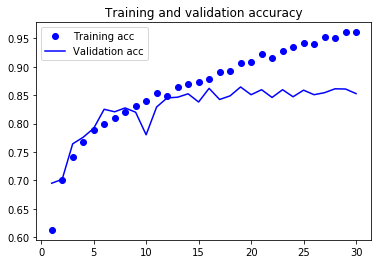

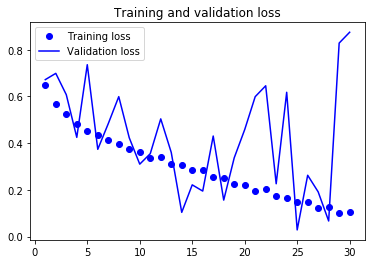

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 31)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()